time-avg chi2_1: 0.006708
time-avg chi2_2: 0.006355
302776
chi2: 0.011733
1338603
chi2: 0.011848
993072
chi2: 0.016342
901420
chi2: 0.014278


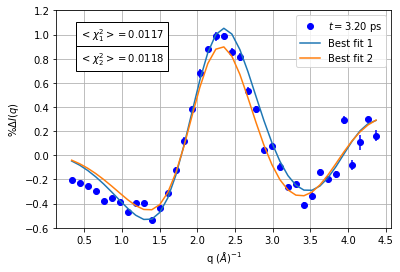

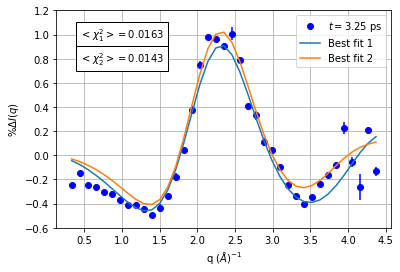

In [6]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt

# 1st conformation
if True:
    N = 1000000
    subtitle = 'allmodes'
    chi2_file = np.load('../data/chi2_%i_%s.npz' % (N, subtitle))
    chi2_array_1 = chi2_file['chi2']
    # load IAM
    f = np.load('../data/iam_arrays_%i_%s.npz' % (N, subtitle))
    q = f['q']
    pcd_1 = f['pcd']
    argmin_array_1 = np.argmin(chi2_array_1[:, :], axis=0)
    chi2_time_avg_1 = 0
    for t in range(len(argmin_array_1)):
        chi2_time_avg_1 += chi2_array_1[argmin_array_1[t], t]
    chi2_time_avg_1 /= 86    
    print('time-avg chi2_1: %f' % chi2_time_avg_1)

# 2nd conformation
if True:
    N = 2000000
    subtitle = 'allmodes'
    chi2_file = np.load('../data/chi2_%i_%s.npz' % (N, subtitle))
    chi2_array_2 = chi2_file['chi2']
    # load IAM
    f = np.load('../data/iam_arrays_%i_%s.npz' % (N, subtitle))
    q = f['q']
    pcd_2 = f['pcd']
    argmin_array_2 = np.argmin(chi2_array_2[:, :], axis=0)
    chi2_time_avg_2 = 0
    for t in range(len(argmin_array_2)):
        chi2_time_avg_2 += chi2_array_2[argmin_array_2[t], t]
    chi2_time_avg_2 /= 86
    print('time-avg chi2_2: %f' % chi2_time_avg_2)    

if True:
    # load experiment data
    datafile = '../data/NMM_exp_dataset.mat'
    mat = scipy.io.loadmat(datafile)
    q_exp = np.squeeze(mat['q'])
    t_exp = np.squeeze(mat['t'])
    pcd_exp = mat['iso']
    errors = mat['iso_stdx']
    i_pre_t0 = 13
    t_exp = t_exp[i_pre_t0:]  # remove before t = 0
    pcd_exp = pcd_exp[:, i_pre_t0:]
    errors = errors[:, i_pre_t0:]

factor = 0.057 # excitation factor
for t in range(71, 73): # time-step
    
    time_step = t
    # load 1st conformation
    i = argmin_array_1[time_step]
    print(i)
    chi2_1 = chi2_array_1[i, time_step]
    print('chi2: %f' % chi2_1)
    theory_1 = factor * pcd_1[:, i]

    # load 2nd conformation
    i = argmin_array_2[time_step]
    print(i)
    chi2_2 = chi2_array_2[i, time_step]
    print('chi2: %f' % chi2_2)   
    theory_2 = factor * pcd_2[:, i]

    #fig, ax = plt.figure()
    plt.figure()
    experiment = pcd_exp[:, time_step]
    plt.plot(q, experiment, 'bo')
    plt.errorbar(q, experiment, 
                 yerr=errors[:, time_step], 
                 xerr=None, fmt='none', ecolor='b')
    plt.plot(q, theory_1)
    plt.plot(q, theory_2)
    #plt.plot(q, (theory - experiment)**2)
    plt.xlabel('q $({\AA})^{-1}$')
    plt.ylabel('$\%\Delta I(q)$')
    plt.ylim((-0.6, 1.2))
    plt.grid()
    plt.legend(('$t =%3.2f$ ps' % t_exp[time_step],
                'Best fit 1',
                'Best fit 2'))
    ypos = 1
    xpos = 1
    plt.text(xpos, ypos, '$<\chi^2_1> = %6.4f$' % chi2_1, 
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=1.0))
    plt.text(xpos, ypos - 0.2, '$<\chi^2_2> = %6.4f$' % chi2_2, 
             horizontalalignment='center',
             verticalalignment='center',
             bbox=dict(facecolor='white', alpha=1.0))
    png_save = True
    if png_save:
        fname = '%i_%s_%3.2f_comparison.png' % (N, subtitle, t_exp[time_step])
        plt.savefig(fname, dpi=150, facecolor='w', 
                edgecolor='w', orientation='portrait', 
                format='png', transparent=False, 
                bbox_inches='tight', pad_inches=0.1, 
                metadata=None)